En este ejemplo se genera la misma señal del ejemplo 4, pero se le añade ruido blanco usando np.random.rand() (ver https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)

Luego, de forma similar al ejemplo 4, se reconstruye la señal original usando la tranformada inversa. Sin embargo, se varía el límite superior del rango de frecuencias de la señal antes de resconstruirla con la transformada inversa. Esto da el efecto de un filtro paso bajo.
Como el ruido es igual para todas las frecuencias, al recortar las frecuencias que no forman parte de la señal original, se reduce su ruido.

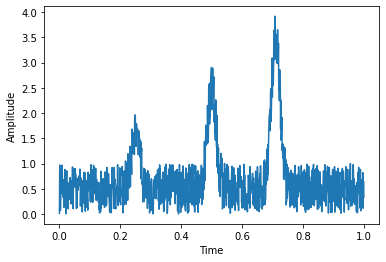

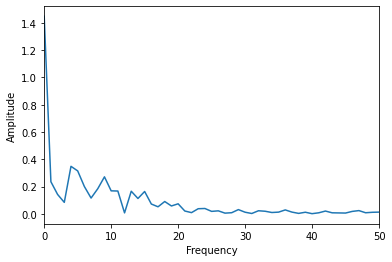

In [17]:
import numpy as np
import matplotlib.pyplot as plt

sample_freq=1000 #Frecuencia de muestreo (Número de puntos o muestras de señal por unidad de tiempo)
dt=1/sample_freq #tiempo entre puntos de la señal.
t_start=0
t_end=1
width=0.02 #Ancho de los pulsos gaussianos
pos1=0.25 #Posición (unidades de tiempo) de cada uno de los tres picos gaussianos
pos2=0.5
pos3=0.71

time=np.arange(t_start,t_end,dt)
signal=np.exp(-((time-pos1)**2/width**2))+2*np.exp(-((time-pos2)**2/width**2))+3*np.exp(-((time-pos3)**2/width**2))
signal=signal+np.random.rand(len(signal))

plt.plot(time,signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

signalFFT=np.fft.rfft(signal)
frequencies=np.fft.rfftfreq(len(signal),dt)
true_amplitude=2*np.abs(signalFFT)/(len(signal))

plt.plot(frequencies,true_amplitude)
plt.xlim([0,50])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

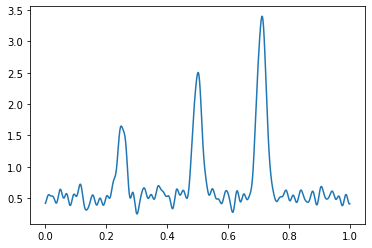

In [23]:
freq_max=50 #Ir variando este límite y ver como el ruido con frecuencias mayores a éste se elimina de la señal.

signal_freq=signalFFT[range(int(freq_max*(t_end-t_start))+1)] #Espectro de frecuencias restringido hasta el rango elegido con freq_max. Notar que en este caso dt=1 por tanto df=1 también.
zeroes=np.zeros(len(signalFFT)-int(freq_max*(t_end-t_start))-1,dtype=complex) #Se llena con ceros los valores de signal_freq que están fuera del límite impuesto con freq_max
signal_freq=np.concatenate((signal_freq,zeroes)) #signal_freq contiene ahora los valores de signal_FFT pero solo hasta la frecuencia límite, el resto son ceros.
invFFT=np.fft.irfft(signal_freq)

plt.plot(time,invFFT)
plt.show()

**Ejercicio:**
Modificar la señal original aplicando un ruido sinusoidal de 60Hz y filtrarla usando la tranformada de fourier para eliminar esta componente.